# Study Output Data

## Load libraries

In [1]:
import pandas as pd
import pprint
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pp = pprint.PrettyPrinter(indent=2)

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
)

## Load data

In [2]:
df = pd.read_pickle("../../data/output/timeseries_2010_2024_6_1_True_True_True_True.pkl")
df = df.astype({"election_type": "category"})

## Basic Information and Summary Statistics

The dataset contains several columns with percentages related to electoral data, demographic information for the year 2021, mean income, and some indices.

In [3]:
# Basic information about the dataset
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
Index: 76245 entries, A20101_08001801001 to M20191_43907601004
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   cens_electoral_percentage_ALTRES      76245 non-null  float64 
 1   cens_electoral_percentage_CS          76245 non-null  float64 
 2   cens_electoral_percentage_CUP         76245 non-null  float64 
 3   cens_electoral_percentage_ERC         76245 non-null  float64 
 4   cens_electoral_percentage_JXCATJUNTS  76245 non-null  float64 
 5   cens_electoral_percentage_PODEMOS     76245 non-null  float64 
 6   cens_electoral_percentage_PP          76245 non-null  float64 
 7   cens_electoral_percentage_PSC         76245 non-null  float64 
 8   cens_electoral_percentage_VOX         76245 non-null  float64 
 9   election_type                         76245 non-null  category
 10  2021_p_born_abroad                    76245 n

In [4]:
# Summary statistics
summary_stats = df.describe()
summary_stats

,cens_electoral_percentage_ALTRES,cens_electoral_percentage_CS,cens_electoral_percentage_CUP,cens_electoral_percentage_ERC,cens_electoral_percentage_JXCATJUNTS,cens_electoral_percentage_PODEMOS,cens_electoral_percentage_PP,cens_electoral_percentage_PSC,cens_electoral_percentage_VOX,2021_p_born_abroad,2021_p_adult,2021_p_child,2021_p_senior,2021_p_young,2021_mean_income,2020_ist
count,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,76245.0,76095.000000
mean,0.885792,5.663807,2.422052,10.841757,15.001018,6.470449,5.726064,11.139925,0.859957,0.194757,0.439637,0.142026,0.200895,0.217442,38066.447374,99.999566
std,2.987071,6.155446,3.794680,8.563810,12.738788,5.952724,4.399244,7.261718,1.709172,0.112697,0.031039,0.033042,0.056155,0.033683,10127.666187,16.665465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.324747,0.000000,0.025932,0.065217,0.0,32.100000
25%,0.192828,1.234568,0.000000,4.144621,4.887586,2.173913,2.631579,6.060606,0.000000,0.111181,0.420145,0.120342,0.163158,0.198614,31472.0,89.900000
50%,0.358209,4.007820,0.722394,9.615385,11.694215,4.954368,4.736842,10.522496,0.000000,0.172533,0.438719,0.140709,0.197891,0.215219,36206.0,101.900000
75%,0.632661,7.800312,3.761419,15.864333,22.048780,9.281165,7.828004,15.490376,0.933489,0.254094,0.458716,0.161847,0.235103,0.234112,41961.0,111.700000
max,83.870968,48.623853,69.381107,83.333333,88.421053,52.510040,61.312217,64.848485,18.913858,0.838191,0.640000,0.313311,0.431818,0.460636,88769.0,140.300000


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

cens_electoral_percentage_ALTRES          0
cens_electoral_percentage_CS              0
cens_electoral_percentage_CUP             0
cens_electoral_percentage_ERC             0
cens_electoral_percentage_JXCATJUNTS      0
cens_electoral_percentage_PODEMOS         0
cens_electoral_percentage_PP              0
cens_electoral_percentage_PSC             0
cens_electoral_percentage_VOX             0
election_type                             0
2021_p_born_abroad                        0
2021_p_adult                              0
2021_p_child                              0
2021_p_senior                             0
2021_p_young                              0
2021_mean_income                          0
2020_ist                                150
dtype: int64

- The dataset contains 76,245 rows and 30 columns.
- There are no missing values in most columns except for ``2020_ist``, which has 150 missing values.
- The dataset primarily consists of float values, except for ``electionid_mundissec`` (object) and ``election_type`` (integer).


- ``2021_mean_income`` ranges from 0 to 88,769, with a mean of 38,066 and a standard deviation of 10,128.
- ``2020_ist`` has a mean close to 100, indicating it might be an index normalized around 100.
- The other columns represent various percentages, with values ranging from 0 to approximately 25.

## Correlation Analysis and Visualizations

Next, let's create some visualizations to better understand the data distribution and correlations:

- Histograms for numerical columns to visualize the distribution.
- Correlation Heatmap to understand the relationships between different features.

C:\Users\guill\AppData\Local\Temp\ipykernel_39588\123935780.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


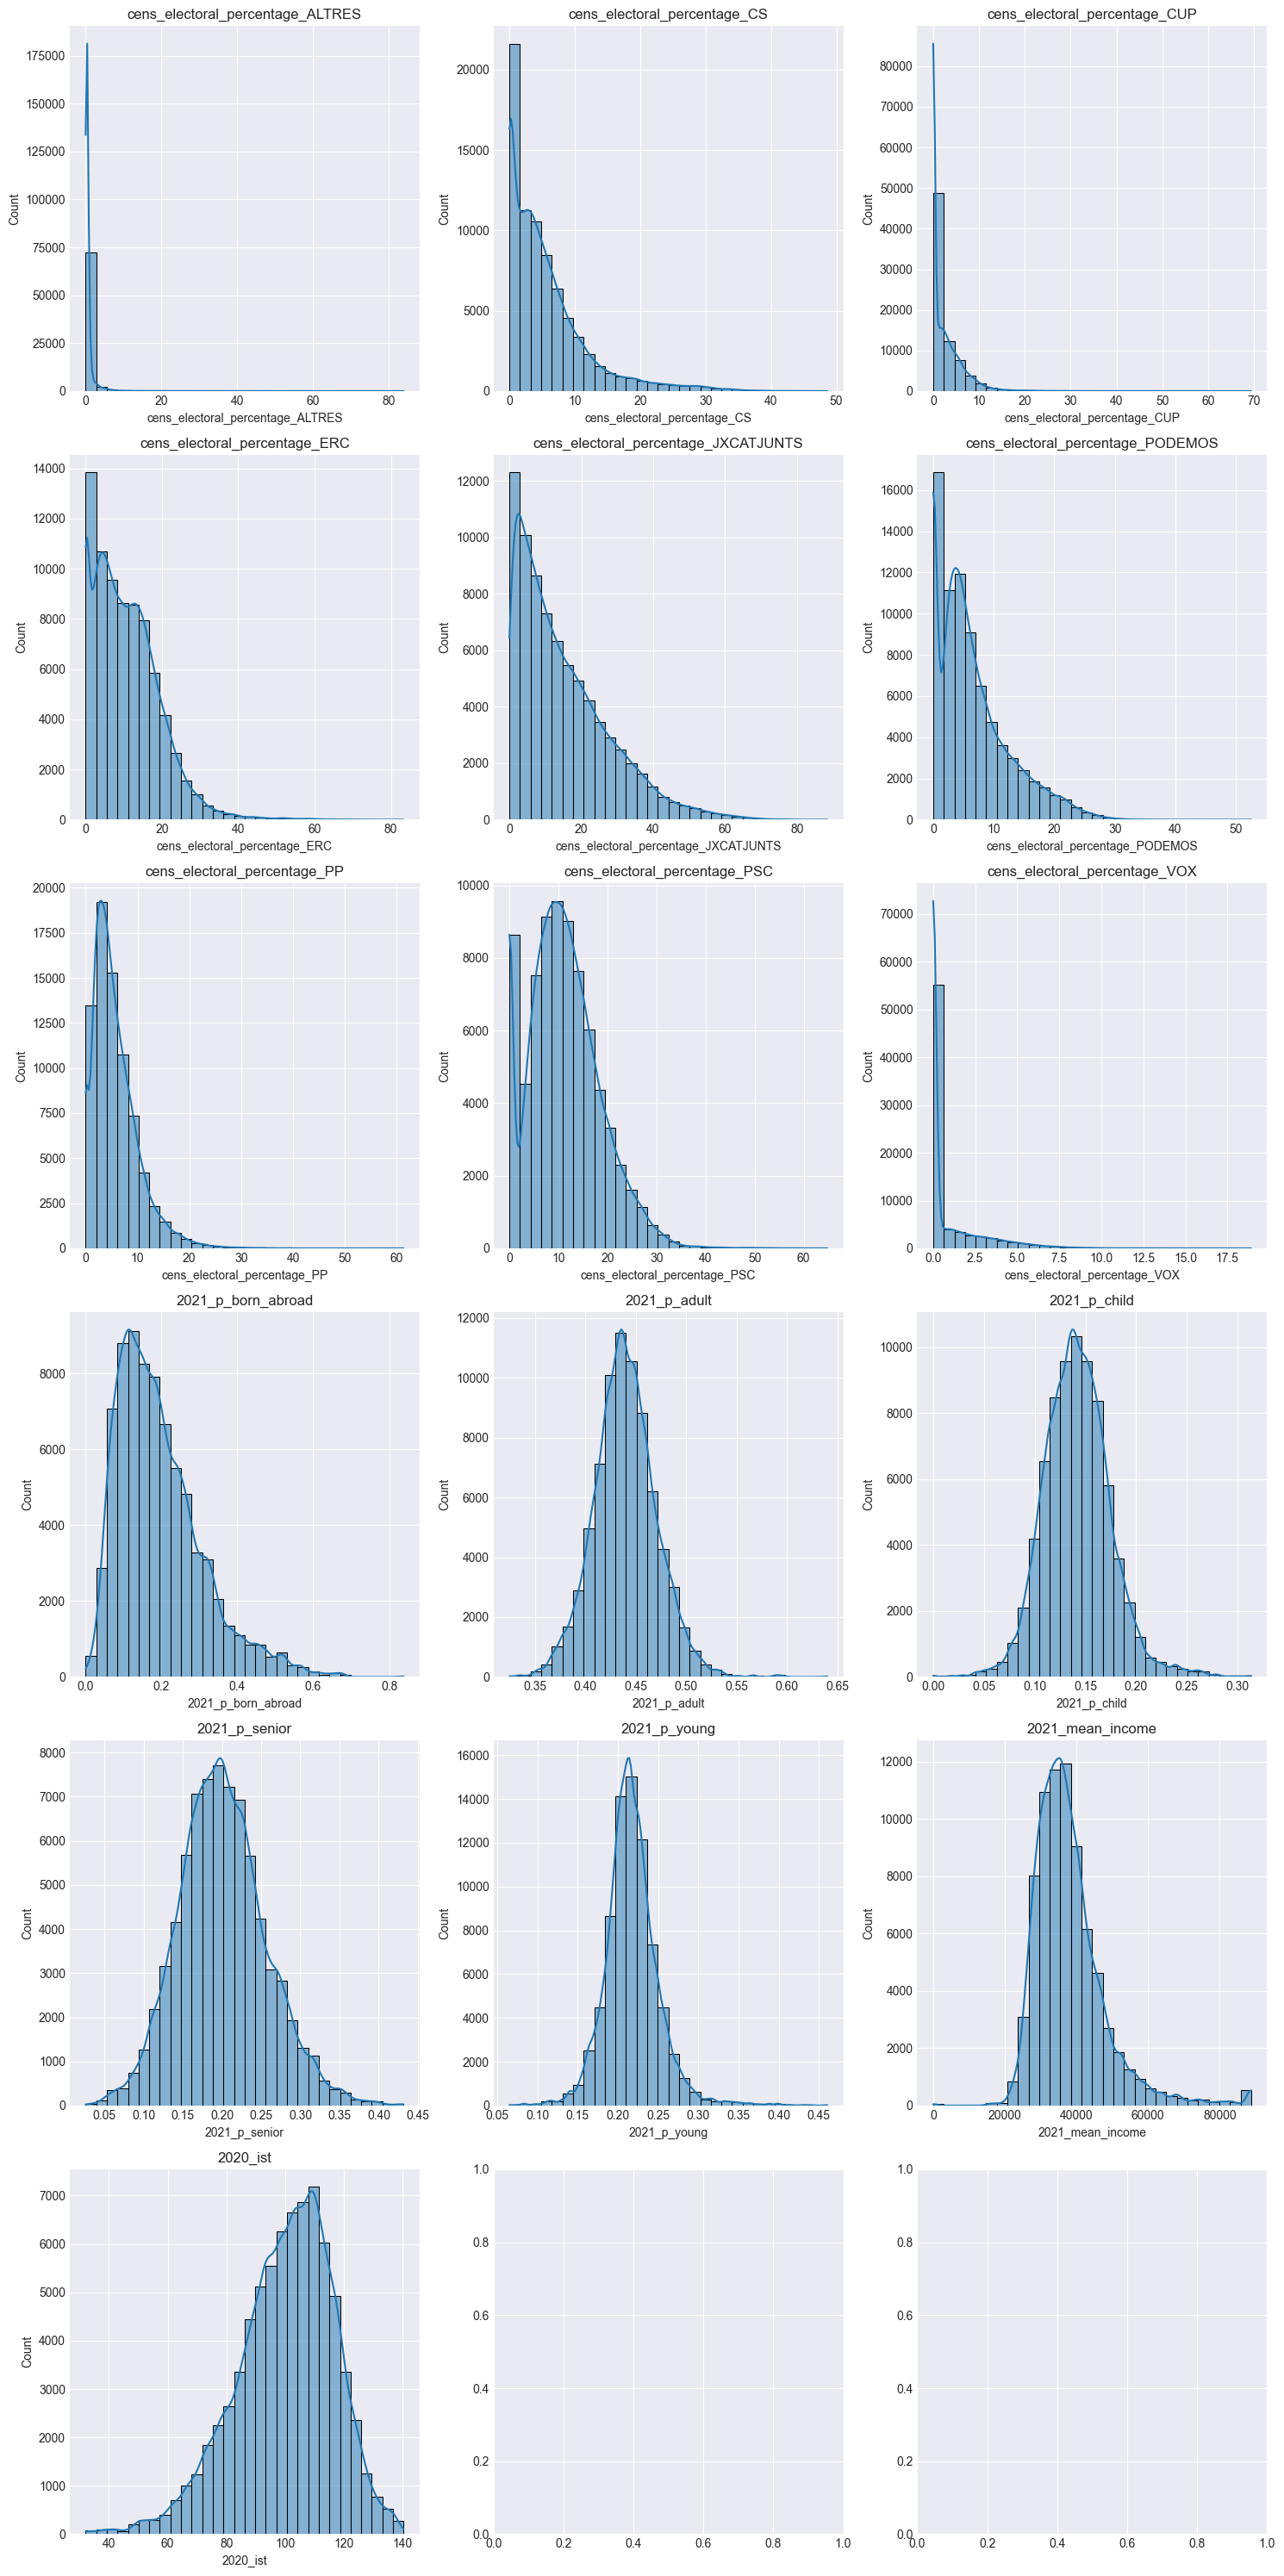

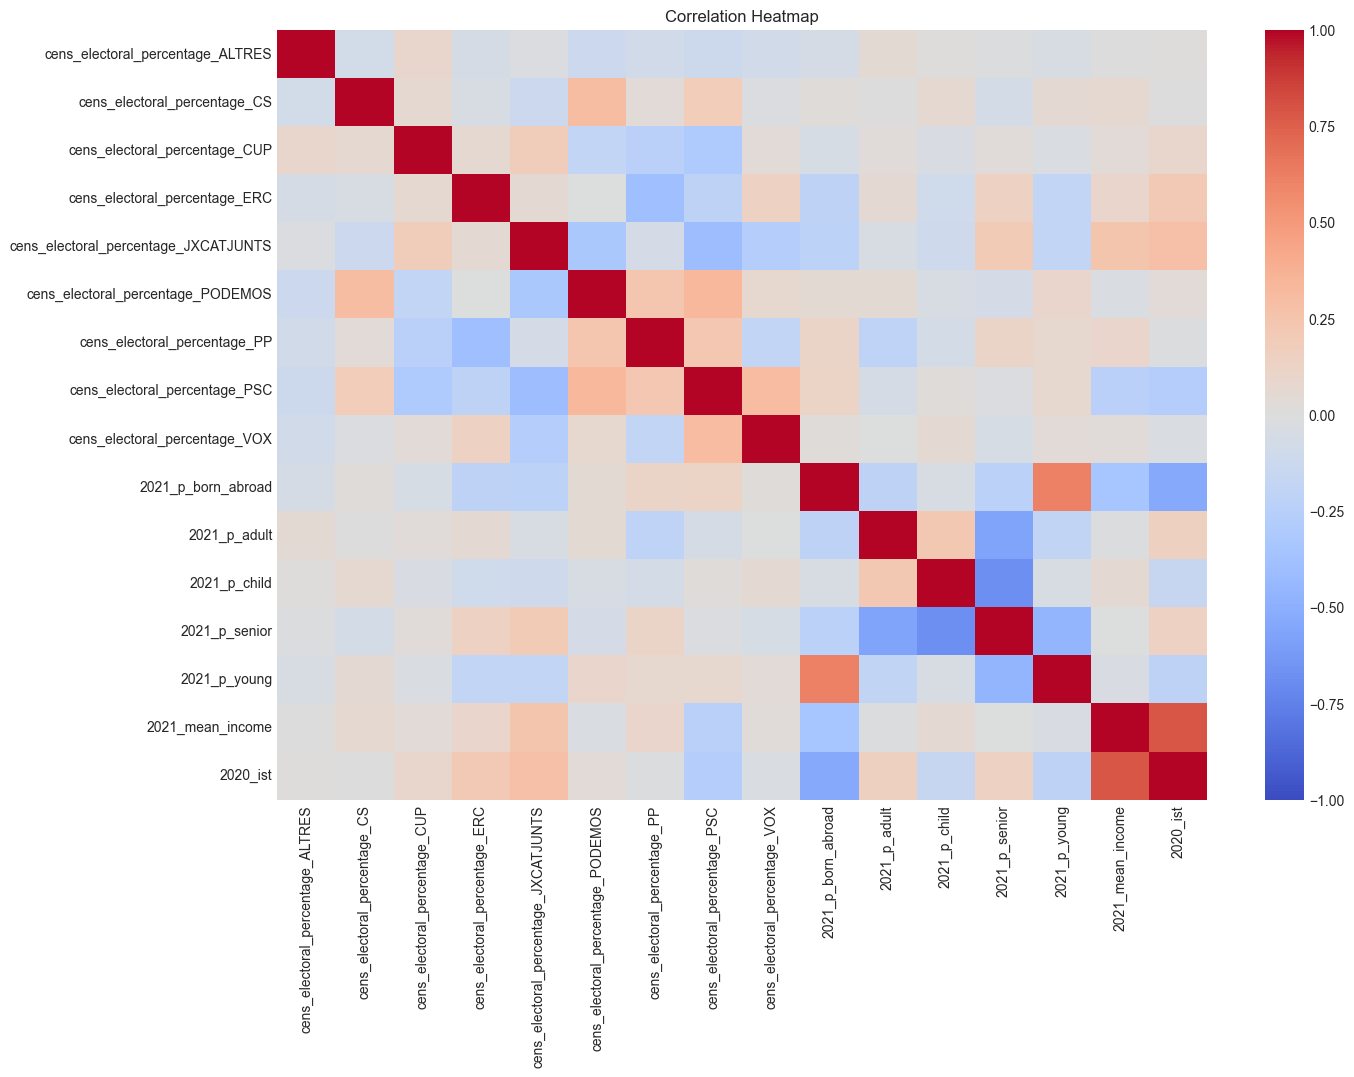

In [6]:
# Set up the plotting configuration
plt.style.use("seaborn-darkgrid")

# Plot histograms for selected numerical columns
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
numerical_columns_df = df[numerical_columns]

# Create histograms
num_cols = len(numerical_columns)
num_rows = (num_cols + 2) // 3  # Adjust the number of rows

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))  # Adjust the figsize
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(col)

plt.tight_layout()
plt.show()

# Correlation heatmap
correlation_matrix = numerical_columns_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

### Key Insights from Visualizations

1. **Histograms**:
   - Most percentage columns have skewed distributions, often towards zero.
   - ``2021_mean_income`` and ``2020_ist`` exhibit more varied distributions, with ``2021_mean_income`` showing a relatively normal distribution centered around 38,000, and ``2020_ist`` centered around 100.

2. **Correlation Heatmap**:
   - There are noticeable correlations among certain percentage columns.
   - ``2020_ist`` shows some correlation with several columns, indicating potential relationships worth further investigation.
   - Other strong correlations can be identified between related demographic percentages (e.g., ``2021_p_child`` and ``2021_p_adult``).